# Indici di performance

Per la valutazione della bontà di un modello di machine learning è fondamentale calcolare indici di performance: si tratta di valori che rappresentano diverse caratteristiche della predizione e che possono essere utilizzare per determinare quale sia la miglior combinazione di iper parametri o il modello più adatto al caso in esame.

## Esempio di dataset


In [ ]:
y_true = [0, 1, 0, 1, 0, 0, 0, 0]
y_pred = [0, 1, 1, 1, 0, 1, 0, 0]

## Simulo esiti diversi dallo stesso modello (per esmpio a causa di cambiamento dei coefficienti)

In [ ]:
y_pred_2 = [0, 0, 1, 1, 0, 1, 0, 0]
y_pred_3 = [0, 1, 0, 1, 0, 1, 0, 0]
y_pred_4 = [0, 1, 0, 1, 0, 1, 1, 1]


## Confusion Matrix

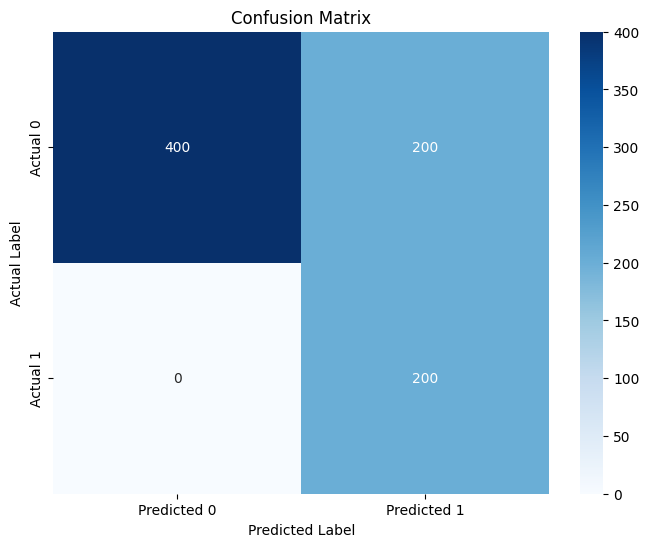

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calcola la confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Crea un DataFrame per una visualizzazione più semplice
cm_df = pd.DataFrame(cm, index = ['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1'])
# Visualizza la confusion matrix con seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

## Accuratezza

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuratezza: {accuracy}")


Accuratezza: 0.75


## Precisione

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_true, y_pred)
print(f"Precisione: {precision}")


Precisione: 0.5


## Sensitività

In [ ]:
# prompt: Calculate sensitivity

from sklearn.metrics import recall_score
sensitivity = recall_score(y_true, y_pred)
print(f"Sensitività: {sensitivity}")

Sensitività: 1.0


## Specificità

In [ ]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Calculate specificity
specificity = tn / (tn + fp)
print(f"Specificità: {specificity}")

Specificità: 0.6666666666666666


## ROC

AUC for y_pred: 0.8333333333333334


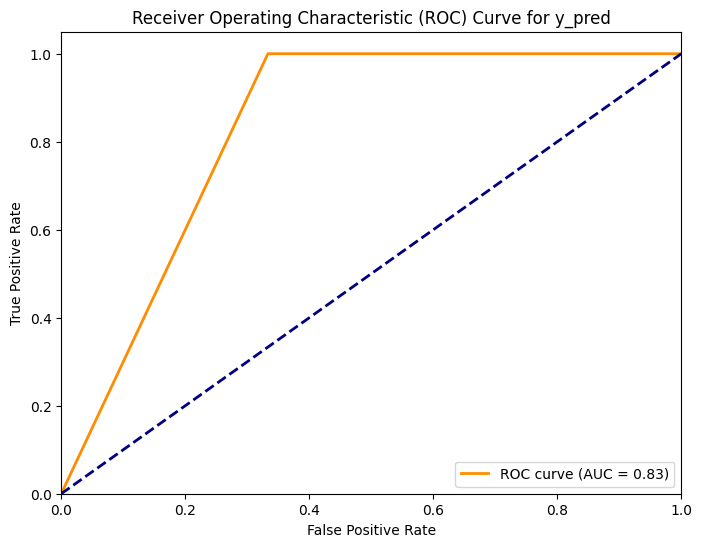

AUC for y_pred_2: 0.5833333333333334
AUC for y_pred_3: 0.9166666666666667
AUC for y_pred_4: 0.75


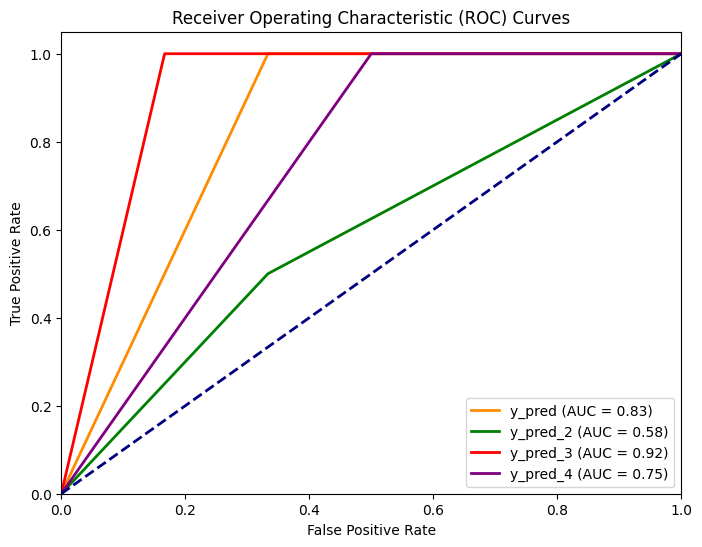

In [ ]:
# prompt: Use AUC e ROC to find performance of a prediction on the y_pred (y_pred, y_pred_2...) and y_true

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC for y_pred
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

print(f"AUC for y_pred: {roc_auc}")

# Plot ROC curve for y_pred
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for y_pred')
plt.legend(loc="lower right")
plt.show()

# Calculate ROC curve and AUC for y_pred_2
fpr_2, tpr_2, thresholds_2 = roc_curve(y_true, y_pred_2)
roc_auc_2 = auc(fpr_2, tpr_2)

print(f"AUC for y_pred_2: {roc_auc_2}")

# Calculate ROC curve and AUC for y_pred_3
fpr_3, tpr_3, thresholds_3 = roc_curve(y_true, y_pred_3)
roc_auc_3 = auc(fpr_3, tpr_3)

print(f"AUC for y_pred_3: {roc_auc_3}")

# Calculate ROC curve and AUC for y_pred_4
fpr_4, tpr_4, thresholds_4 = roc_curve(y_true, y_pred_4)
roc_auc_4 = auc(fpr_4, tpr_4)

print(f"AUC for y_pred_4: {roc_auc_4}")

# Optional: Plot all ROC curves on the same plot for comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'y_pred (AUC = {roc_auc:.2f})')
plt.plot(fpr_2, tpr_2, color='green', lw=2, label=f'y_pred_2 (AUC = {roc_auc_2:.2f})')
plt.plot(fpr_3, tpr_3, color='red', lw=2, label=f'y_pred_3 (AUC = {roc_auc_3:.2f})')
plt.plot(fpr_4, tpr_4, color='purple', lw=2, label=f'y_pred_4 (AUC = {roc_auc_4:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
